In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 26 11:07:42 2018

@author: hassan.naseri
"""

# Import the Qiskit SDK
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, IBMQ, available_backends, execute
from qiskit.tools.visualization import plot_circuit, plot_histogram

# This is only to disable extra warnings/messages
import logging
logging.getLogger("qiskit.tools.visualization").setLevel(logging.ERROR)

In [2]:
# Save your credentials (API Token).
# You can get it from https://quantumexperience.ng.bluemix.net/qx/account,
# looking for "Personal Access Token" section.
# NOTE: you need to save your credentials only once!
#APItoken = ''
#ProjectURL = ''
#IBMQ.save_account(APItoken, ProjectURL)

# Authenticate with the IBM Q API in order to use online devices.
# You need your credentials (API Token) to be already saved.
#IBMQ.load_accounts()

# Alternatively you can enable your account without saving it.
#IBMQ.enable_account(APItoken, ProjectURL)


In [3]:
# See a list of available backends
print("Local backends: ", Aer.backends()) # Local backend (simulator only)
#print("IBMQ backends: ", IBMQ.backends()) # IBMQ backends

Local backends:  [<QasmSimulator('qasm_simulator') from Aer()>, <QasmSimulatorPy('qasm_simulator_py') from Aer()>, <StatevectorSimulator('statevector_simulator') from Aer()>, <StatevectorSimulatorPy('statevector_simulator_py') from Aer()>, <UnitarySimulator('unitary_simulator') from Aer()>, <CliffordSimulator('clifford_simulator') from Aer()>]


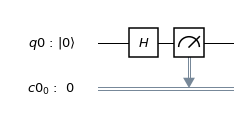

In [4]:
# Create a Quantum Register with 1 qubit. The initial state is |0>
q = QuantumRegister(1)
# Create a Classical Register with 1 bit.
c = ClassicalRegister(1)
# Create a Quantum Circuit
qc = QuantumCircuit(q, c)

# Add Hadamard gate to the qubit, putting it in superposition state.
qc.h(q)

# Add a Measurement gate to see the state.
qc.measure(q, c)

plot_circuit(qc)

In [5]:
# Compile and run the Quantum circuit on a local simulator backend
# By default, it will run for 1000 shots
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend)
# Compile and run the Quantum circuit on an IBM Q backend
#backend = IBMQ.get_backend('')
#job_sim = execute(qc, backend)

sim_result = job_sim.result()

# Show the results
print("simulation: ", sim_result)
print(sim_result.get_counts(qc))

simulation:  COMPLETED
{'0': 526, '1': 498}


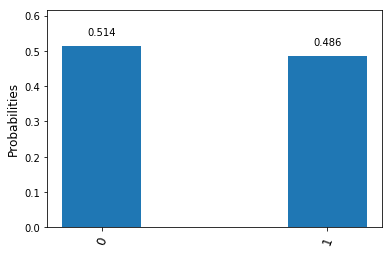

In [6]:
plot_histogram(sim_result.get_counts(qc))